## Spectral Index - CB4_64_16D_STK_1

This document presents examples of spectral index calculations in the CBERS4 collection V1 (CB4_64_16D_STK_1) of the BDC.

> This simple example aims to present how to load the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/stac/).

In [1]:
import datacube
dc = datacube.Datacube(app='datacube')

In [2]:
PRODUCT_NAME = "CB4_64_16D_STK_1"
PRODUCT_FACTOR = 10000

**Load CB4_64_16D_STK_v1 product**

Initially, an entire scene will be loaded, in a range of specific dates

In [3]:
cb4_64_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['red', 'green', 'blue', 'evi', 'nir', 'ndvi'], 
                                            time = ("2019-12-19", "2019-12-31"), 
                                            resolution = (64, -64), limit = 1)
cb4_64_16d_ftile

<xarray.Dataset>
Dimensions:      (time: 1, x: 10505, y: 6866)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-25
  * y            (y) float64 1.01e+07 1.01e+07 1.01e+07 ... 1.054e+07 1.054e+07
  * x            (x) float64 5.635e+06 5.635e+06 ... 4.963e+06 4.963e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1169 1233 -9999
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1497 1508 -9999
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1286 1388 -9999
    evi          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 5292 5455 -9999
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 3462 3528 -9999
    ndvi         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 4951 4820 -9999
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [4]:
cb4_64_16d_stile = cb4_64_16d_ftile.isel(x = slice(0, 1500), y = slice(0, 1500))
cb4_64_16d_stile

<xarray.Dataset>
Dimensions:      (time: 1, x: 1500, y: 1500)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-25
  * y            (y) float64 1.01e+07 1.01e+07 1.01e+07 ... 1.019e+07 1.019e+07
  * x            (x) float64 5.635e+06 5.635e+06 ... 5.539e+06 5.539e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 613 530 491 465
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 718 709 708 691
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 281 259 246 245
    evi          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 4997 5307 5331
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 3470 3615 3560
    ndvi         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 7350 7608 7689
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

Viewing the selected region

In [5]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc46d226d30>)

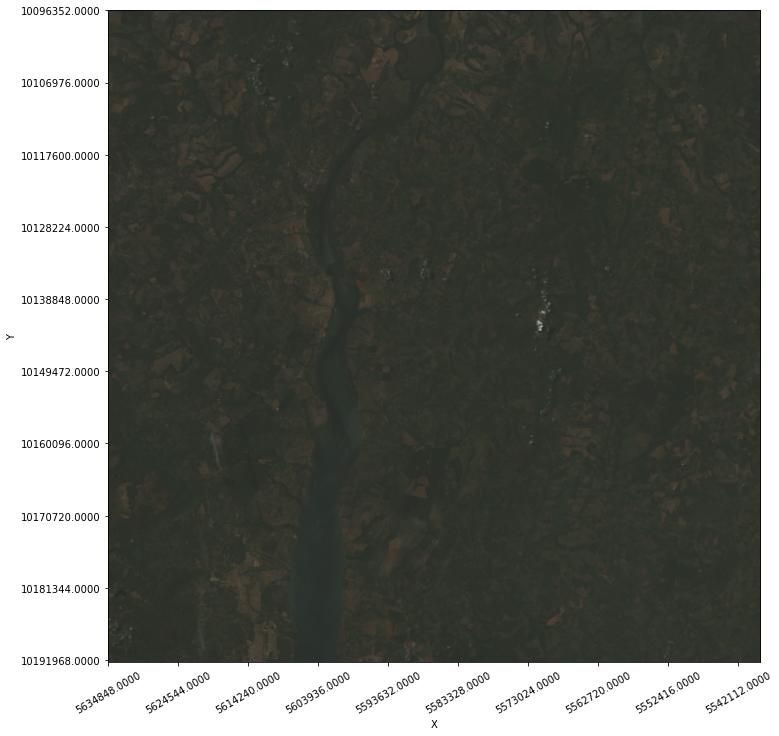

In [6]:
rgb(cb4_64_16d_stile, figsize = (12, 12), x_coord = 'x', y_coord = 'y')

## Spectral Index

In this section, the spectral indices are displayed. Note that some of them are already available inside the BDC products

### NDVI



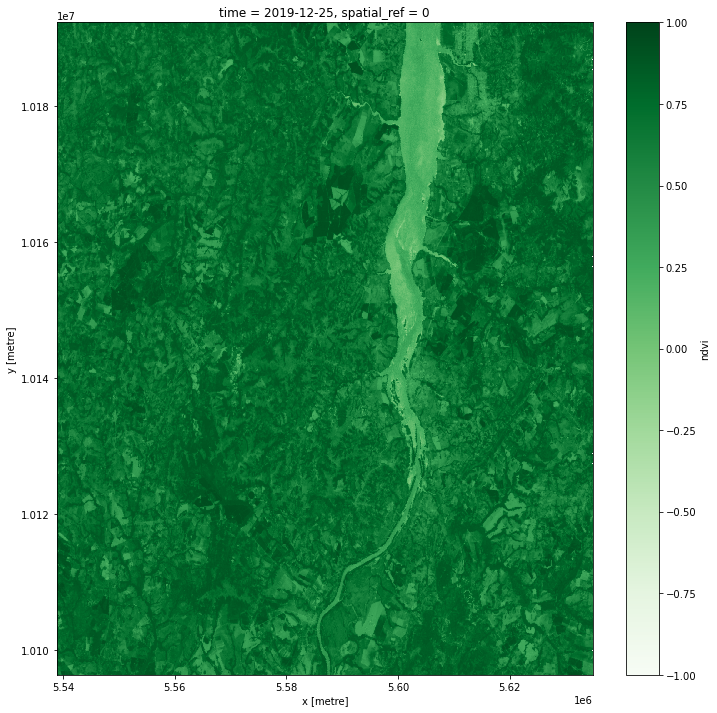

In [7]:
(cb4_64_16d_stile.ndvi / PRODUCT_FACTOR).plot(figsize=(12, 12), cmap = "Greens", vmin=-1.0, vmax=1.0)

### EVI

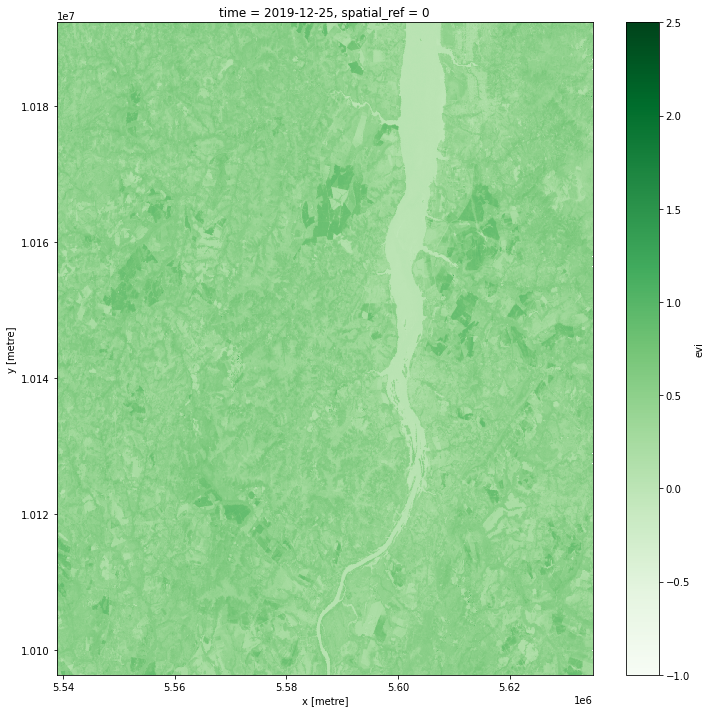

In [8]:
(cb4_64_16d_stile.evi / PRODUCT_FACTOR).plot(figsize=(12, 12), cmap = "Greens", vmin=-1.0, vmax=2.5)

### NDWI

In [9]:
# function to calc ndwi
def ndwi_fnc(dataset):
    return (dataset.green - dataset.nir) / (dataset.green + dataset.nir)

cb4_64_16d_stile_ndwi = ndwi_fnc(cb4_64_16d_stile)

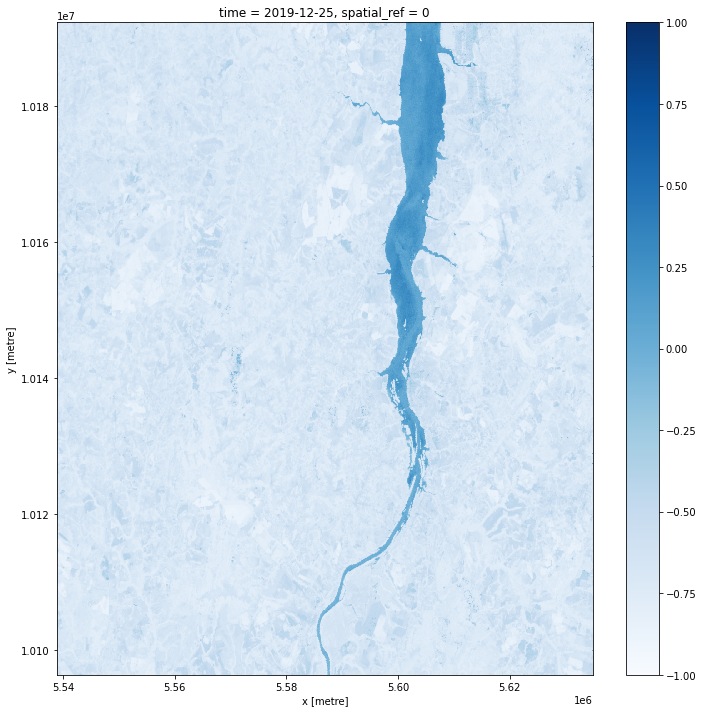

In [10]:
(cb4_64_16d_stile_ndwi).plot(figsize=(12, 12), cmap = "Blues", vmin=-1.0, vmax=1.0)